Welcome to the Investigate a Dataset project! In it we perform some basic analytic operation on data of movies and conclude some relation between it's parameters

# Project:TMBD Movie Data

TMDb Movie Data is the choosen dataset The database contains information about movies collected from The Movies Database, including revenue, budget.

### Table of contents:
 * Question
 * Wrangling data
 * Cleaning
 * Explore
 * Conclusions

### Introduction
>This data set contains information about 10,000 movies collected from The Movie Database (TMDb),Here we have some interesting data to some operation include maintaining and cleaning to finially have some valuable data , and this depend on the questios we ask like :
   * 1-Which genres are most popular from year to year?
   * 2-What kinds of properties are associated with movies that have high revenues?



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter


### 1. question

In this section of the report, I will load dataframe and see features

In [2]:
df=pd.read_csv("tmdb-movies.csv")

In [3]:
#print column labels in dataframe
for i,v in enumerate (df.columns):
    print(i,v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


### 2.Wrangle

In this section of the report, I will see data at least first fifth rows ,describe data and see if it contains null or duplicated values

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
#n.rows
df.shape[0]

10866

In [8]:
#n.columns
df.shape[1]

21

In [9]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [10]:
#columns with missing values
df.isna().any()[lambda x:x]

imdb_id                 True
cast                    True
homepage                True
director                True
tagline                 True
keywords                True
overview                True
genres                  True
production_companies    True
dtype: bool

In [11]:
df["homepage"].isna().count()

10866

In [12]:
df["tagline"].isna().count()

10866

### 3.Cleaning

I removed the columns cast, homepage, tagline, keywords, overview and imdb id to improve database redability. The column 'genres' and 'productions_companies' were not in the first normal form which requires that in the table should not have multiple value in the same row of data. I was unable to create a second joined column, so I decided to remove the values after the first '|' sign to get better grouping and cleaner visualization in the further analysis.

In [13]:
df.drop(['homepage','tagline'],axis=1,inplace=True)

> I dropped both columns because n.home page and tagline null values is very bad and i see it isn't affect completely on other features and

In [14]:
#to place changes on main dataframe
df.dropna(inplace=True)

In [15]:
df.shape[0]

8665

In [16]:
df.duplicated().sum()

1

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.shape[0]

8664

>There isn't duplicated data in our dataset

In [19]:
#what's the longest runtime 
df['runtime'].max()

705

In [20]:
#what's the lowest runtime 
df['runtime'].min()

0

In [21]:
x=df[df['runtime']==0]

In [22]:
df.drop(x.index[0:7],inplace=True)

In [23]:
df.shape

(8657, 19)

> There is no films have run time 0 in real. so i removed rows training examples which have 0 in runtime feature

### 4.explore

Now we trimmed and cleaned the data, moving on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section. looking for relationships between variables.

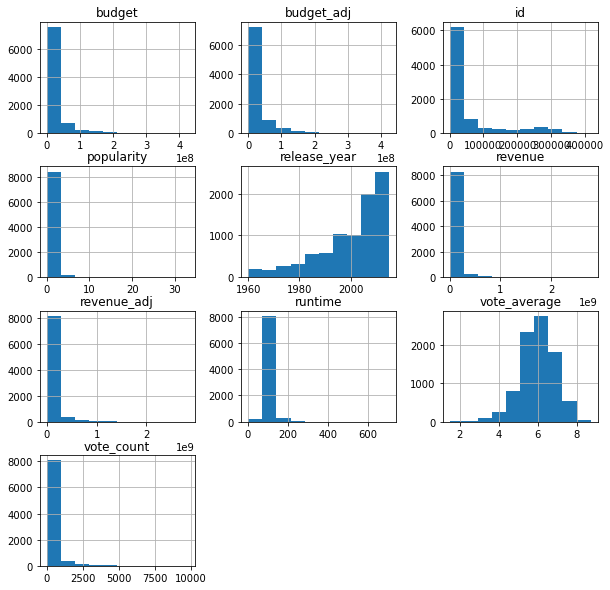

In [24]:
df.hist(figsize=(10,10));

> * release time data isleft skewed -->most movies released from 2000:...
* vote average is almost normal distributed

In [25]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,0.031444,-0.115891,-0.079185,-0.087254,-0.005005,-0.069778,0.494752,-0.169685,-0.124983
popularity,0.031444,1.000000,0.533168,0.659199,0.164420,0.801511,0.244923,0.137422,0.497879,0.601653
budget,-0.115891,0.533168,1.000000,0.729295,0.227666,0.624829,0.089652,0.170798,0.967393,0.611221
revenue,-0.079185,0.659199,0.729295,1.000000,0.195066,0.786612,0.194370,0.095955,0.699398,0.916579
runtime,-0.087254,0.164420,0.227666,0.195066,1.000000,0.197049,0.203164,-0.125249,0.266824,0.211793
vote_count,-0.005005,0.801511,0.624829,0.786612,0.197049,1.000000,0.288394,0.150259,0.576464,0.700303
vote_average,-0.069778,0.244923,0.089652,0.194370,0.203164,0.288394,1.000000,-0.123732,0.102731,0.218221
release_year,0.494752,0.137422,0.170798,0.095955,-0.125249,0.150259,-0.123732,1.000000,0.066154,-0.037582
budget_adj,-0.169685,0.497879,0.967393,0.699398,0.266824,0.576464,0.102731,0.066154,1.000000,0.635821
revenue_adj,-0.124983,0.601653,0.611221,0.916579,0.211793,0.700303,0.218221,-0.037582,0.635821,1.000000


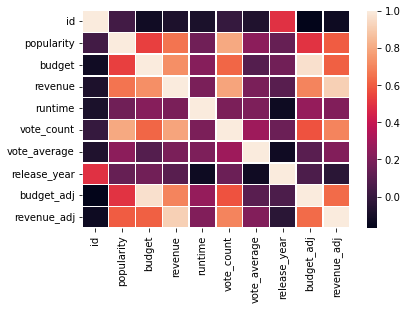

In [26]:
#heatmap
sns.heatmap(df.corr(),cbar=True,linewidths=0.5)

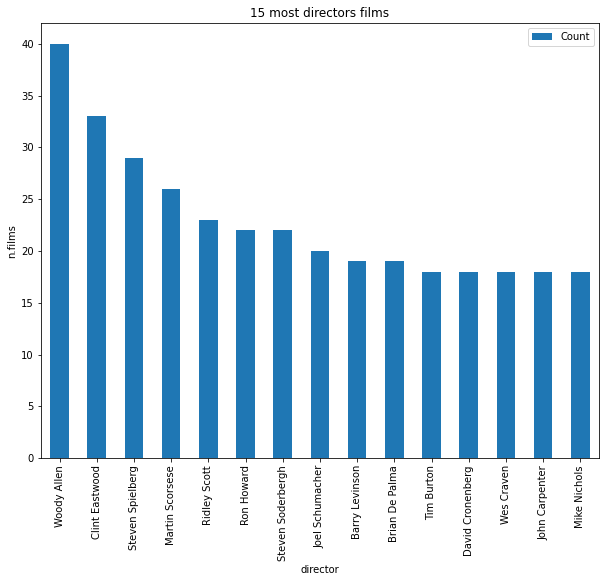

In [27]:
#moat commom films made by which directors
words = pd.Series((df["director"]))
fig, ax = plt.subplots(figsize=(10,8))
lst = Counter(words).most_common(15)
new_df = pd.DataFrame(lst, columns = ['Word', 'Count'])
new_df.plot.bar(x='Word',y='Count', ax=ax)
plt.title('15 most directors films')
plt.ylabel('n.films')
plt.xlabel('director')
plt.show()

In [28]:
t=(df["director"].value_counts()<3)
s=(df["director"].value_counts()>15)

In [29]:
print("There are " ,len(t[t==True]), " have films less than 5.")
print("There are " ,len(s[s==True]), " have films more than 30")

There are  3046  have films less than 5.
There are  24  have films more than 30


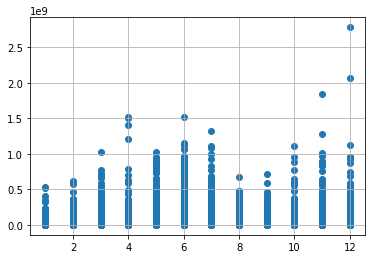

In [30]:
# revenue and month released
df["release_date"]=pd.to_datetime(df["release_date"])
# revenue and month releaed
x=df["release_date"].dt.month
y=df["revenue"] 
plt.scatter(x,y)
plt.grid()
plt.show()

>* in month 6,7,12,4,9 revenue increased more

In [31]:
def graph(column,title):
    words = pd.Series(' '.join(column).split('|'))
    fig, ax = plt.subplots(figsize=(10,8))
    lst = Counter(words).most_common(15)
    New_df = pd.DataFrame(lst, columns = ['Word', 'Count'])
    New_df.plot.bar(x='Word',y='Count', ax=ax)
    plt.title(title)
    plt.ylabel('n.films')
    plt.xlabel(column.name)
    plt.show()

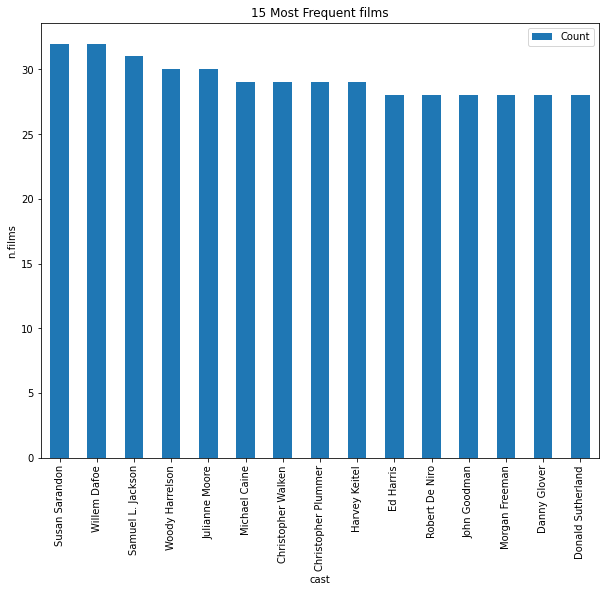

In [32]:
#what's the most common actors and n.films they have?
graph(df['cast'],'15 Most Frequent films')

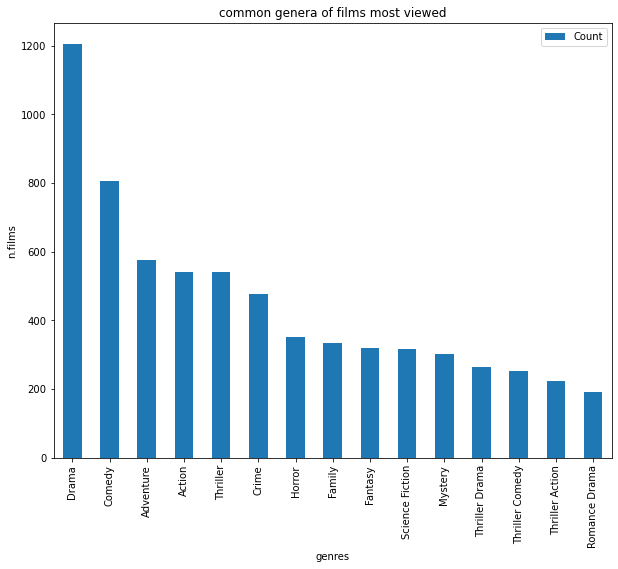

In [33]:
#what's the most common genera of films most viewed
graph(df["genres"],"common genera of films most viewed")

>the most genera type of films most viewed is drama then comedy

In [34]:
#which movie has the max rate ever
df[df["vote_average"]==df["vote_average"].max()]["original_title"]

6911    Pink Floyd: Pulse
Name: original_title, dtype: object

In [35]:
#which movie has the min rate ever
df[df["vote_average"]==df["vote_average"].min()]["original_title"]

7772                Transmorphers
10865    Manos: The Hands of Fate
Name: original_title, dtype: object

In [36]:
#which movies has revenue is more than budget (succeeded)
len(df[df["budget"]<df["revenue"]])

3551

In [37]:
#the mean average vote of succeded films
(df[df["budget"]<df["revenue"]])["vote_average"].unique().mean()

5.771698113207548

In [38]:
#which movies has budget is more than revenue (failed)
len(df[df["budget"]>df["revenue"]])

2032

In [39]:
#the mean average vote of failed films
(df[df["budget"]<df["revenue"]])["vote_average"].unique().mean()

5.771698113207548

In [40]:
def relation(column_1,column_2,title):
    plt.figure
    sns.regplot(x=column_1, y=column_2 )
    plt.grid()
    plt.title(title)
    plt.show()
    

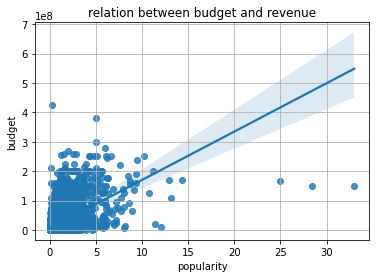

In [41]:
#the relation between budget and revenue
relation(df["popularity"],df["budget"],"relation between budget and revenue" )

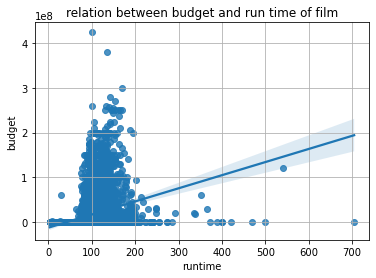

In [42]:
#relation between budget and run time of film
relation(df["runtime"],df["budget"],"relation between budget and run time of film" )

In [43]:
# Sort movies by revenue in descending order

sorted_revenue_biggest = df.sort_values(by=['revenue'], ascending = False).head(200)
sorted_revenue_biggest.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09


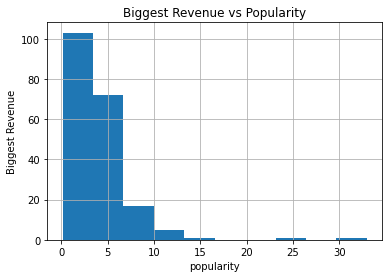

In [44]:
sorted_revenue_biggest.popularity.hist()
plt.title('Biggest Revenue vs Popularity')
plt.xlabel('popularity')
plt.ylabel('Biggest Revenue');

>The relation between popularity and revenue of film is right skewed data

In [45]:
#which genere gives best rates
df.groupby(df['genres'])['vote_average'].agg(['max','min'])

,max,min
genres,,
Action,7.5,4.2
Action|Adventure,7.7,3.8
Action|Adventure|Animation,7.5,5.7
Action|Adventure|Animation|Comedy|Drama,5.6,5.6
Action|Adventure|Animation|Drama|Family,6.3,6.3
...,...,...
Western|Drama|Crime|Romance,5.8,5.8
Western|History,6.0,6.0
Western|History|War,5.9,5.9


### Conclusions

Here we reach at the the end of this report which have involved :

        (1) the description of data ;
        (2) the information about it's fields ;
        (3) visualazing them ;
        (4) cleaning undesirable data ;
        (5) finding relation between parameters

### Limitations:

    (1)The current dataset have many missing records.
    (2)There are many records which was useless.the results will be more clear if there another related fields.
    (3)The way we sampled the data may influence our results.Another sample may lead to different insights.
    (4)an issue during data collections, leading to corrupt/wrong data.